<a href="https://colab.research.google.com/github/oldhero5/polka_price_predictor/blob/main/polka_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary: Many Parts impact the cryptocurrency ecosystem. In this quick notebook were going to use the prophet to predict the next 24 hours of trading.

In [ ]:
#! pip3 install yfinance prophet

# Raw Package
import numpy as np
import pandas as pd
from prophet import Prophet
import plotly
#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

In [ ]:
data = yf.download(tickers='DOT-USD', period = '7d', interval = '15m')

[*********************100%***********************]  1 of 1 completed


In [96]:
#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Polkadot Live Prices',
    yaxis_title=' Polkadot Price (kUS Dollars)')

# X-Axes
# fig.update_xaxes(
#     rangeslider_visible=True,
#     rangeselector=dict(
#         buttons=list([
#             dict(count=15, label="15m", step="minute", stepmode="backward"),
#             dict(count=45, label="45m", step="minute", stepmode="backward"),
#             dict(count=1, label="HTD", step="hour", stepmode="todate"),
#             dict(count=6, label="6h", step="hour", stepmode="backward"),
#             dict(step="all")
#         ])
#     )
# )

#Show
fig.show()

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-27 00:00:00+00:00,18.072672,18.145178,18.009350,18.104048,18.104048,13828352
2022-01-27 00:15:00+00:00,18.110664,18.154415,18.110664,18.133280,18.133280,356736
2022-01-27 00:30:00+00:00,18.129141,18.139030,18.054703,18.139030,18.139030,2864512
2022-01-27 00:45:00+00:00,18.131878,18.143501,18.113508,18.116877,18.116877,0
2022-01-27 01:00:00+00:00,18.112635,18.116583,17.932177,17.962217,17.962217,1253376
...,...,...,...,...,...,...
2022-02-02 18:00:00+00:00,19.288097,19.321753,19.287540,19.287540,19.287540,1407360
2022-02-02 18:15:00+00:00,19.289885,19.305359,19.275764,19.275764,19.275764,850816
2022-02-02 18:30:00+00:00,19.277905,19.396608,19.277905,19.395464,19.395464,4339072


In [ ]:
# Adjust data for Input into the prophet model
data.reset_index(inplace=True)
data[["Datetime","Close"]]
dict = {'Datetime': 'ds',
        'Close': 'y'}
df = data.rename(columns = dict,
                 inplace = True)
df['ds']=df['ds'].astype(str).str[:-6]
df.head()

,ds,y
0,2022-01-27 00:00:00,18.104048
1,2022-01-27 00:15:00,18.133280
2,2022-01-27 00:30:00,18.139030
3,2022-01-27 00:45:00,18.116877
4,2022-01-27 01:00:00,17.962217


In [ ]:
# Create the prophet object
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#Build the future dataframe in this case 48 is equal to 12 hours
future = m.make_future_dataframe(periods = 1)
future.tail()

,ds
649,2022-02-02 18:15:00
650,2022-02-02 18:30:00
651,2022-02-02 18:45:00
652,2022-02-02 18:49:00
653,2022-02-03 18:49:00


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
649,2022-02-02 18:15:00,19.941271,19.654863,20.207521
650,2022-02-02 18:30:00,19.949030,19.661435,20.227417
651,2022-02-02 18:45:00,19.957519,19.698260,20.261474
652,2022-02-02 18:49:00,19.959913,19.686397,20.238950
653,2022-02-03 18:49:00,20.257786,19.083072,21.501995


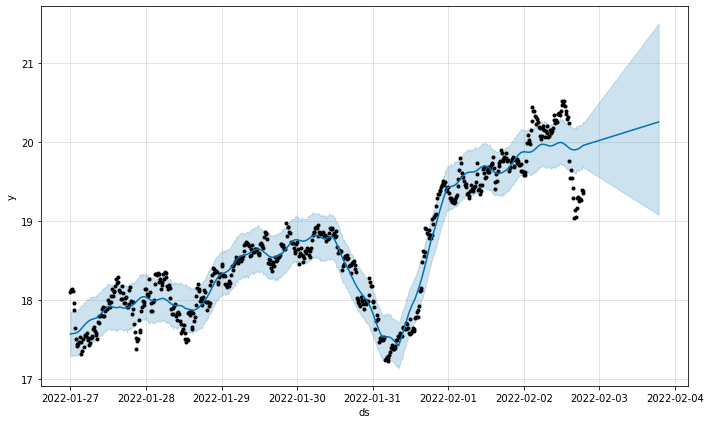

In [ ]:
# Plot the predictions
fig1 = m.plot(forecast)


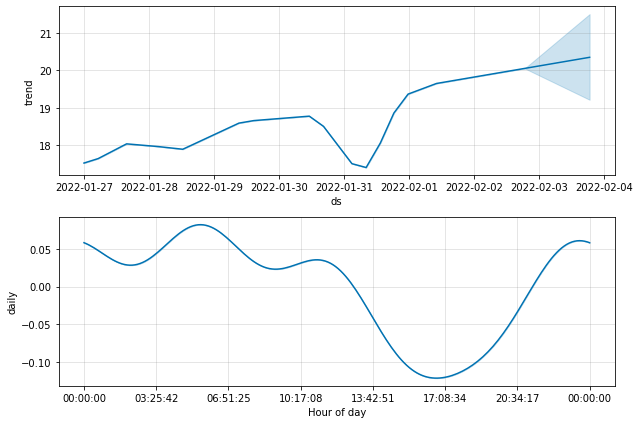

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

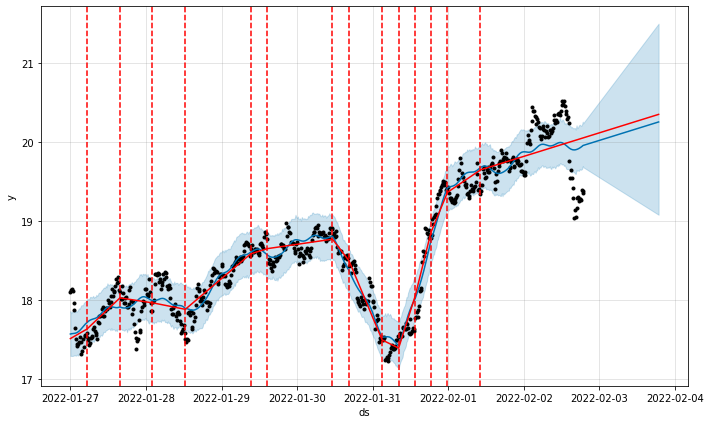

In [92]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


Now lets look at AVAX

In [103]:
avax= yf.download(tickers='AVAX-USD', period = '7d', interval = '15m')

[*********************100%***********************]  1 of 1 completed


In [100]:
#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=avax.index,
                open=avax['Open'],
                high=avax['High'],
                low=avax['Low'],
                close=avax['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Avalanche Live Prices',
    yaxis_title=' Avalanche Price (kUS Dollars)')

# X-Axes
# fig.update_xaxes(
#     rangeslider_visible=True,
#     rangeselector=dict(
#         buttons=list([
#             dict(count=15, label="15m", step="minute", stepmode="backward"),
#             dict(count=45, label="45m", step="minute", stepmode="backward"),
#             dict(count=1, label="HTD", step="hour", stepmode="todate"),
#             dict(count=6, label="6h", step="hour", stepmode="backward"),
#             dict(step="all")
#         ])
#     )
# )

#Show
fig.show()

In [104]:
# Adjust data for Input into the prophet model
avax.reset_index(inplace=True)
avax[["Datetime","Close"]]
dict = {'Datetime': 'ds',
        'Close': 'y'}
avax.rename(columns = dict,
                 inplace = True)
avax['ds']=avax['ds'].astype(str).str[:-6]
avax.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2022-01-27 00:00:00,65.966316,66.206261,65.606316,66.193291,66.193291,7636608
1,2022-01-27 00:15:00,66.229515,66.440445,66.229515,66.429565,66.429565,1196544
2,2022-01-27 00:30:00,66.409821,66.505890,66.196770,66.505890,66.505890,3070976
3,2022-01-27 00:45:00,66.480034,66.582664,66.467026,66.544312,66.544312,234496
4,2022-01-27 01:00:00,66.522491,66.540756,65.884552,65.922951,65.922951,1847040


In [105]:
# Create the prophet object
m = Prophet()
m.fit(avax)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [106]:
#Build the future dataframe in this case 48 is equal to 12 hours
future = m.make_future_dataframe(periods = 1)
future.tail()

,ds
654,2022-02-02 19:30:00
655,2022-02-02 19:45:00
656,2022-02-02 20:00:00
657,2022-02-02 20:14:00
658,2022-02-03 20:14:00


In [107]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
654,2022-02-02 19:30:00,72.730184,71.516132,73.914467
655,2022-02-02 19:45:00,72.727846,71.526170,74.085738
656,2022-02-02 20:00:00,72.736409,71.513059,73.978277
657,2022-02-02 20:14:00,72.755402,71.463371,73.928012
658,2022-02-03 20:14:00,74.035269,70.283910,77.911210


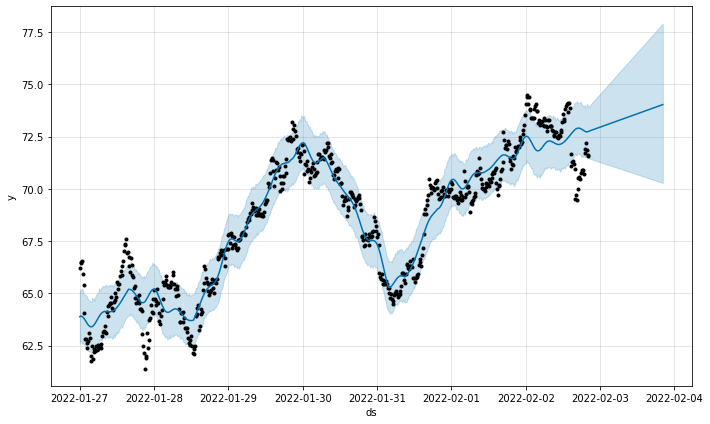

In [108]:
# Plot the predictions
fig1 = m.plot(forecast)

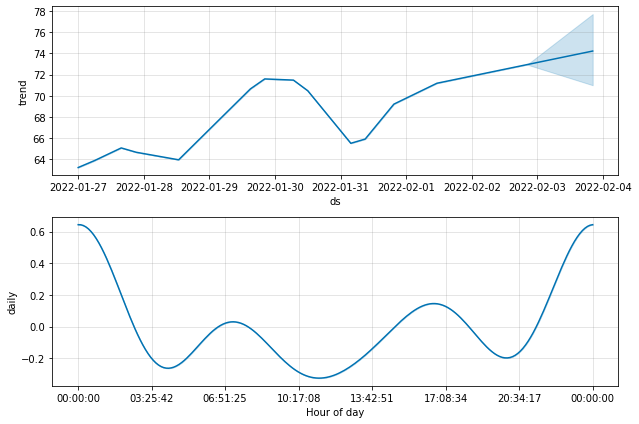

In [109]:
fig2 = m.plot_components(forecast)

In [110]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

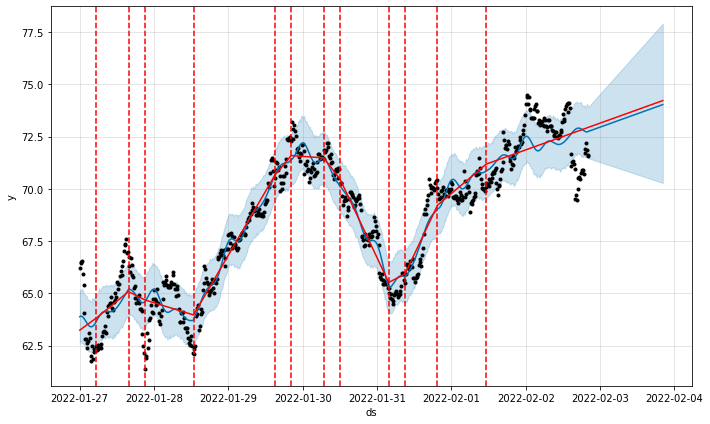

In [111]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)